# Imports and Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MultipleLocator
import numpy as np
import datetime
from matplotlib.gridspec import GridSpec
from astropy.io import fits
from scipy.interpolate import interp1d


# Function to convert MJD to datetime
def mjd_to_date(mjd):
    mjd_epoch = datetime.datetime(1858, 11, 17)
    return mjd_epoch + datetime.timedelta(days=mjd)

# Set the ticks and labels for the secondary x-axis
def mjd_formatter(x):
    date = mjd_to_date(x)
    return date.strftime('%Y')

def date_to_mjd(date):
    """
    Convert a given date to its corresponding Modified Julian Date (MJD).
    """
    # MJD epoch (November 17, 1858)
    mjd_epoch = datetime.datetime(1858, 11, 17, 0, 0, 0)
    # Calculate the difference in days
    delta = date - mjd_epoch
    # Return the number of days as MJD
    return delta.days + delta.seconds / 86400

# Fits file to pandas dataframe
def fits_to_dataframe(fits_file):
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Assuming the data is in the first extension
        data = hdul[1].data
        # Convert to a Pandas DataFrame
        df = pd.DataFrame(data)
    return df

# Function that takes arrays of date and magnitude and returns arrays of daily averages
def average_daily_magnitude(mjd, mag, mag_err, ten_day_avg=False):
    int_mjd = np.floor(mjd).astype(int) # Convert MJD to integer days
    if ten_day_avg == True: 
        int_mjd = (int_mjd //10) * 10 # round down to nearest 10
    unique_days = np.unique(int_mjd) # Find unique days
    
    avg_mag = []
    avg_mag_err = []
    for day in unique_days:
        # Find average of daily measurements
        multiple_mag = np.where(int_mjd == day)[0] # Find indices of measurements taken on this day

        # Average mag value
        day_avg_mag = np.mean(mag[multiple_mag])
        avg_mag.append(day_avg_mag)
        
        # Sum together square of error/value then sqrt to propagate average mag errors
        error_sum = 0
        for day_index in multiple_mag:
            error_sum += (mag_err[day_index])**2
        day_avg_mag_err = 1/len(multiple_mag) * np.sqrt(error_sum)
        avg_mag_err.append(day_avg_mag_err)

    return unique_days, np.array(avg_mag), np.array(avg_mag_err)


neowise_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/irsa_table_neowise_single_exposure_J02454549.csv'
allwise_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/irsa_table_allwise_p3as_mep.csv'
#ztfsnad_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ZTF18abuamgo_20240927/detections.csv'
ztfsnad_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ZTF18abuamgo_20241120/detections.csv'
vircam_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ADP.2020-02-10T10_15_28.554.fits'
catalina_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/CRTS_27-07-24.csv'
asassn_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ASASSN_29-07-24.csv'
atlas_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ATLAS_01-08-24.txt'
atlas_c_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ATLAS_clean_c_filter.csv'
atlas_o_file_path = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/ATLAS_clean_o_filter.csv'


# Read the CSV file into a DataFrame
neowise_df = pd.read_csv(neowise_file_path)
allwise_df = pd.read_csv(allwise_file_path)
ztfsnad_df = pd.read_csv(ztfsnad_file_path)
vircam_df = fits_to_dataframe(vircam_file_path)
catalina_df = pd.read_csv(catalina_file_path)
asassn_df = pd.read_csv(asassn_file_path)
atlas_df = pd.read_fwf(atlas_file_path)
# Cleaned and flux weighted average results from Charlotte_ATLAS_FP_Clean_Template.ipynb
atlas_c_df = pd.read_csv(atlas_c_file_path)
atlas_o_df = pd.read_csv(atlas_o_file_path)

catalina_df

,MasterID,Mag,Magerr,RA,Dec,MJD,Blend
0,1004015054394,16.43,0.07,41.43945,-3.08035,53712.22101,0
1,1004015054394,16.48,0.07,41.43937,-3.08036,53712.22460,0
2,1004015054394,16.53,0.08,41.43946,-3.08038,53712.22818,0
3,1004015054394,16.56,0.08,41.43931,-3.08034,53712.23176,0
4,1004015054394,16.42,0.07,41.43940,-3.08039,53729.22553,0
...,...,...,...,...,...,...,...
296,1004015054394,16.37,0.07,41.43933,-3.08047,56577.41690,0
297,1004015054394,16.35,0.07,41.43930,-3.08045,56591.31679,0
298,1004015054394,16.29,0.07,41.43929,-3.08043,56591.32684,0
299,1004015054394,16.29,0.07,41.43926,-3.08041,56591.33689,0


# ALeRCE ZTF Photometry

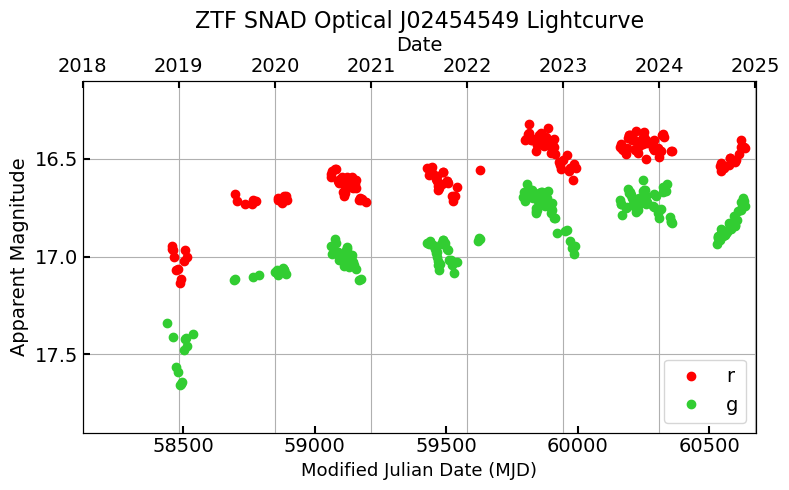

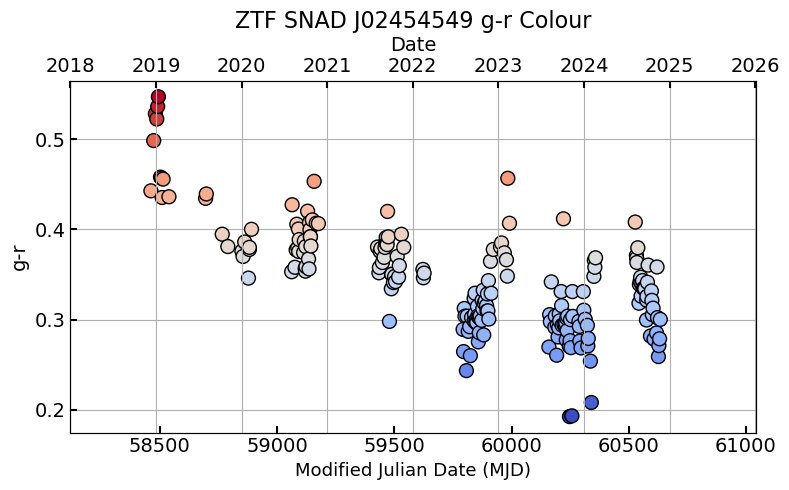

In [21]:
# First split into the 2 bands stored
g_band = ztfsnad_df[ztfsnad_df['fid']==1]
r_band = ztfsnad_df[ztfsnad_df['fid']==2]

mjd_ztf_r = r_band['mjd']
mjd_ztf_g = g_band['mjd']
mag_ztf_r = r_band['mag_corr']
mag_ztf_g = g_band['mag_corr']
#mag_ztf_r_diff = r_band_diff['diffmaglim']
#mag_ztf_g_diff = g_band_diff['diffmaglim']


# Plot light curve
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.5)) # Set y-axis major ticks to 0.5 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_ztf_g.min()
mjd_end = mjd_ztf_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 1
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ZTF SNAD Optical J02454549 Lightcurve', fontsize=16)

ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax1.set_ylim(17.9, 16.1)
ax2.grid(axis='x')
ax1.grid(axis='y')

ax2.plot(mjd_ztf_r, mag_ztf_r, 'o', color='red', label='r')
ax2.plot(mjd_ztf_g, mag_ztf_g, 'o', color='limegreen', label='g')
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Apparent Magnitude', fontsize=14)


# Lines marking spectroscopy
#ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data spectra was recorded
#ax2.set_ylim(17.8, 16.2)

ax2.legend(frameon=True, loc='lower right', fontsize=14)
fig.tight_layout()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ZTF_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()


'''
# Plot difference light curve
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.5)) # Set y-axis major ticks to 0.5 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_ztf_g_diff.min()
mjd_end = mjd_ztf_g_diff.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 1
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ZTF SNAD Optical J02454549 Lightcurve', fontsize=16)

ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
#ax1.set_ylim(17.9, 16.1)
ax2.grid(axis='x')
ax1.grid(axis='y')

ax2.plot(mjd_ztf_r, mag_ztf_r_diff, 'o', color='red', label='r')
ax2.plot(mjd_ztf_g, mag_ztf_g_diff, 'o', color='limegreen', label='g')
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Difference Magnitude', fontsize=14)


# Lines marking spectroscopy
#ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data spectra was recorded
#ax2.set_ylim(17.8, 16.2)

ax2.legend(frameon=True, loc='lower right', fontsize=14)
fig.tight_layout()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ZTF_Difference_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()
'''



# Calculate the color (g - r)
interp_func = interp1d(mjd_ztf_r, mag_ztf_r, kind='linear', fill_value="extrapolate")  # You can change the interpolation method
mag_ztf_r_interpolated = interp_func(mjd_ztf_g)
g_minus_r = mag_ztf_g - mag_ztf_r_interpolated
g_minus_r = g_minus_r[1:]
mjd_colour = mjd_ztf_g[1:]

#plt.plot(mjd_ztf_g[1:], mag_ztf_r_interpolated[1:], linestyle='None', marker='o')
#plt.plot(mjd_ztf_g, mag_ztf_g, linestyle='None', marker='o')
#plt.show()

# Plot ZTF colour
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.1)) # Set y-axis major ticks to 0.5 steps
#ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_ztf_g.min()
mjd_end = mjd_ztf_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year
year_end = mjd_to_date(mjd_end).year + 2 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 1
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ZTF SNAD J02454549 g-r Colour', fontsize=16)

ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
#ax1.set_ylim(17.9, 16.1)
ax2.grid(axis='x')
ax1.grid(axis='y')

#ax2.plot(mjd_colour, g_minus_r, 'o')
# Normalize g_minus_r to map to the colormap
norm = plt.Normalize(vmin=min(g_minus_r), vmax=max(g_minus_r))

# Create a scatter plot with color mapping
sc = ax2.scatter(mjd_colour, g_minus_r, c=g_minus_r, cmap='coolwarm', norm=norm, edgecolor='black', s=100)

# Add a colorbar to show the mapping
#cbar = plt.colorbar(sc, ax=ax2)
#cbar.set_label('g - r Colour Index')

ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('g-r', fontsize=14)


# Lines marking spectroscopy
#ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data spectra was recorded
#ax2.set_ylim(17.8, 16.2)

#ax2.legend(frameon=True, loc='lower right', fontsize=14)
fig.tight_layout()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ZTF_Colour.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

# Combine ZTF Lightcurve and Colour Plots

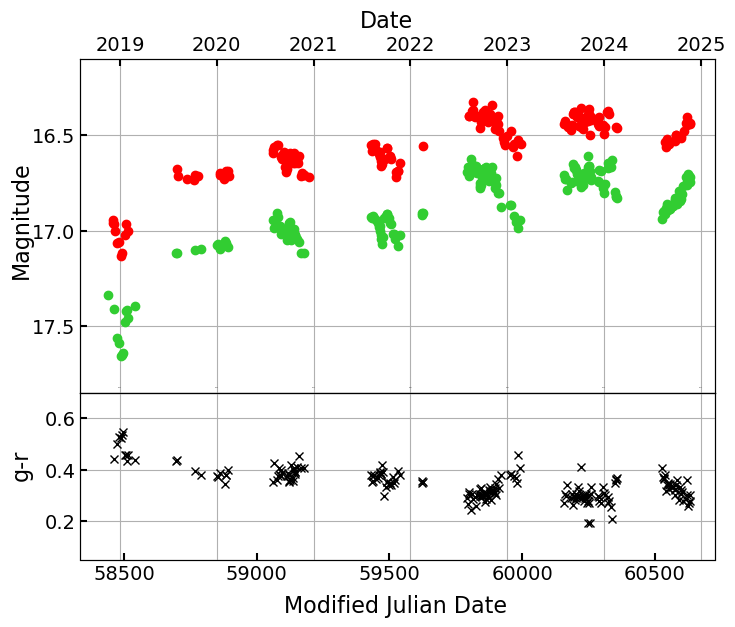

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7), sharex=True, height_ratios=[1, 0.5])
axtop1 = ax1.twiny() # Create a secondary x-axis on the top
axtop2 = ax2.twiny()

# Get the range of MJD values and corresponding years
mjd_start = mjd_ztf_g.min()
mjd_end = mjd_ztf_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year+1 # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 1
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years and plot year grid lines
axtop1.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax1.set_xlim(mjd_start - 150, mjd_end + 50)
axtop1.set_xlim(ax1.get_xlim())
axtop1.set_xticks(year_ticks)
axtop1.set_xticklabels(year_labels)
axtop1.grid(axis='x')
ax1.grid(axis='y')
axtop2.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax2.set_xlim(mjd_start - 150, mjd_end + 50)
axtop2.set_xlim(ax2.get_xlim())
axtop2.set_xticks(year_ticks)
axtop2.set_xticklabels(year_labels)
axtop2.grid(axis='x')
ax2.grid(axis='y', which='both')

# Plot ZTF
axtop1.plot(mjd_ztf_r, mag_ztf_r, 'o', color='red', label='r', markersize=6)
axtop1.plot(mjd_ztf_g, mag_ztf_g, 'o', color='limegreen', label='g', markersize=6)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.invert_yaxis()
ax1.set_ylim(17.85, 16.1)
ax1.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)


# Plot g-r color
# Normalize g_minus_r to map to the colormap
#norm = plt.Normalize(vmin=min(g_minus_r), vmax=max(g_minus_r))
# Create a scatter plot with color mapping
#sc = axtop2.scatter(mjd_colour, g_minus_r, c=g_minus_r, cmap='coolwarm', norm=norm, edgecolor='black', s=100)

axtop2.plot(mjd_colour, g_minus_r, color='black', markersize=6, marker='x', linestyle='None')
ax2.set_ylim(0.05, 0.7)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)


# Axis Labels
fig.text(0.535, 0.925, 'Date', ha='center', fontsize=16)
fig.text(0.545, 0.09, 'Modified Julian Date', ha='center', fontsize=16)
fig.text(0.117, 0.65, 'Magnitude', va='center', rotation='vertical', fontsize=16)
fig.text(0.117, 0.3, 'g-r', va='center', rotation='vertical', fontsize=16)


# Lines marking spectroscopy
#ax1.vlines(60550, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data 2024 spectra was recorded
#ax2.vlines(60550, 0, 0.8, linestyle='--', color='black', linewidth=2)
#ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data 2022 spectra was recorded
#ax2.vlines(59830, 0, 0.8, linestyle='--', color='black', linewidth=2)

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.165, left=0.195)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "Photometry_with_colour.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

# NEOWISE Photometry

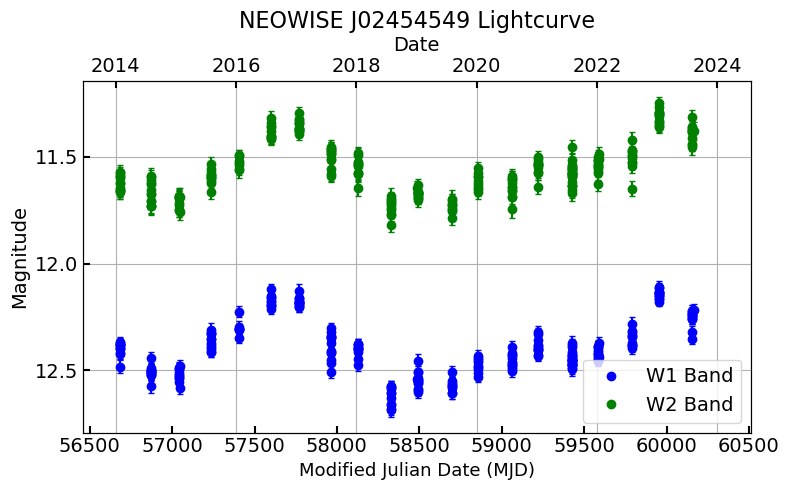

In [70]:
# Quality score value for each frame given as ranking from 0-10. All values have either 10,5,0 so I remove the 0 value. Also works only keeping 10
neowise_df = neowise_df[neowise_df['qual_frame']!=0]

mjd_neowise = neowise_df['mjd']
mag_neowise_w1 = neowise_df['w1mpro']
mag_err_neowise_w1 = neowise_df['w1sigmpro']
mag_neowise_w2 = neowise_df['w2mpro']
mag_err_neowise_w2 = neowise_df['w2sigmpro']

# Plot figure
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.5)) # Set y-axis major ticks to 0.5 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_neowise.min()
mjd_end = mjd_neowise.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start-200, mjd_end+200)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('NEOWISE J02454549 Lightcurve', fontsize=16)
ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax2.grid(axis='x')
ax1.grid(axis='y')

ax2.errorbar(mjd_neowise, mag_neowise_w1, yerr=mag_err_neowise_w1 , marker='None', linestyle='None', capsize=2, color='blue')
ax2.plot(mjd_neowise, mag_neowise_w1, 'o', color='blue', label='W1 Band')
ax2.errorbar(mjd_neowise, mag_neowise_w2, yerr=mag_err_neowise_w2 , marker='None', linestyle='None', capsize=2, color='green')
ax2.plot(mjd_neowise, mag_neowise_w2, 'o', color='green', label='W2 Band')
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Magnitude', fontsize=14)

fig.tight_layout()
ax2.legend(frameon=True, loc='lower right', fontsize=14)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "NEOWISE_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

Catalina RTS Photometry

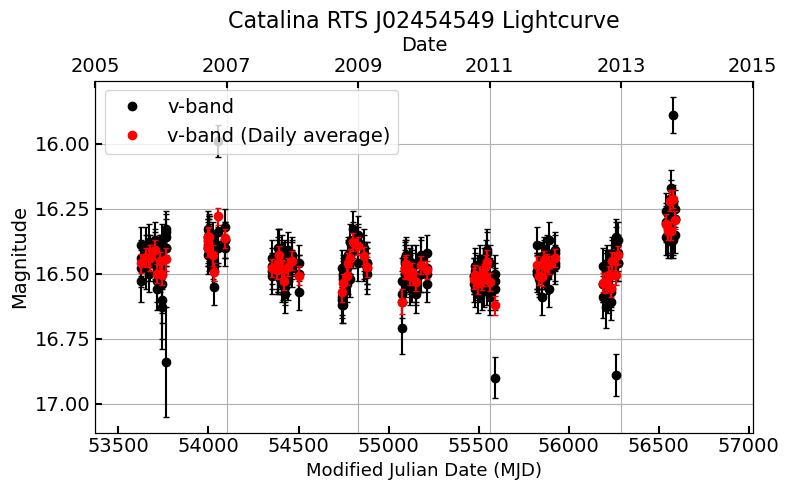

16.45347222222222

In [10]:
mjd_catalina = catalina_df['MJD']
mag_catalina = catalina_df['Mag']
mag_err_catalina = catalina_df['Magerr']

# Compute daily averaged values
avg_mjd_catalina, avg_mag_catalina, avg_mag_err_catalina = average_daily_magnitude(mjd_catalina, mag_catalina, mag_err_catalina)

# Plot figure
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.25)) # Set y-axis major ticks to 0.5 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_catalina.min()
mjd_end = mjd_catalina.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year
year_end = mjd_to_date(mjd_end).year + 2 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('Catalina RTS J02454549 Lightcurve', fontsize=16)
ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax2.grid(axis='x')
ax1.grid(axis='y')
#ax1.set_ylim(16.8, 15.95)

# Plot data
ax2.errorbar(mjd_catalina, mag_catalina, yerr=mag_err_catalina , marker='None', linestyle='None', capsize=2, color='black')
ax2.plot(mjd_catalina, mag_catalina, 'o', color='black', label='v-band')
# Daily average magnitude instead of individual measurements
ax2.errorbar(avg_mjd_catalina, avg_mag_catalina, yerr=avg_mag_err_catalina, marker='None', linestyle='None', capsize=2, color='red')
ax2.plot(avg_mjd_catalina, avg_mag_catalina, 'o', color='red', label='v-band (Daily average)')
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Magnitude', fontsize=14)

fig.tight_layout()
ax2.legend(frameon=True, loc='upper left', fontsize=14)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "Catalina_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

total = 0
count = 0
for i in range(len(avg_mjd_catalina)):
    if avg_mjd_catalina[i] < 53850:
        total += avg_mag_catalina[i]
        count += 1
avg = total/count
avg

ASASSN Photometry

In [11]:
asassn_df = asassn_df[asassn_df['mag_err']/pd.to_numeric(asassn_df['mag'], errors='coerce') < 0.05]
asassn_v_df = asassn_df[asassn_df['Filter'] == 'V']
asassn_v_df.reset_index(drop=True, inplace=True) # reset index to go from 0
asassn_g_df = asassn_df[asassn_df['Filter'] == 'g']
asassn_g_df.reset_index(drop=True, inplace=True)

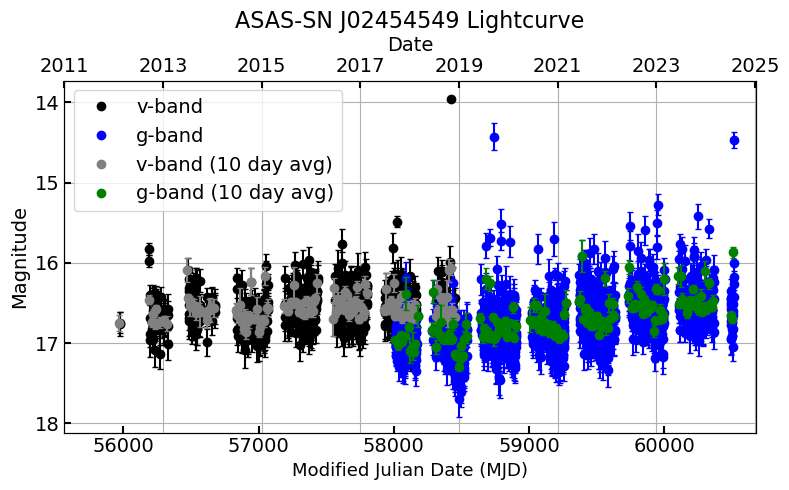

In [12]:
mjd_asassn_v = asassn_v_df['HJD'] - 2400000.5
mag_asassn_v = pd.to_numeric(asassn_v_df['mag'], errors='coerce')
mag_err_asassn_v = asassn_v_df['mag_err']
mjd_asassn_g = asassn_g_df['HJD'] - 2400000.5
mag_asassn_g = pd.to_numeric(asassn_g_df['mag'], errors='coerce')
mag_err_asassn_g = asassn_g_df['mag_err']

# Calculate daily averaged measurements
avg_mjd_asassn_v, avg_mag_asassn_v, avg_mag_err_asassn_v = average_daily_magnitude(mjd_asassn_v, mag_asassn_v, mag_err_asassn_v, True)
avg_mjd_asassn_g, avg_mag_asassn_g, avg_mag_err_asassn_g = average_daily_magnitude(mjd_asassn_g, mag_asassn_g, mag_err_asassn_g, True)

# Plot figure
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(1)) # Set y-axis major ticks to 1 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_asassn_v.min()
mjd_end = mjd_asassn_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year - 1 # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ASAS-SN J02454549 Lightcurve', fontsize=16)
ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax2.grid(axis='x')
ax1.grid(axis='y')

# Plot data
ax2.errorbar(mjd_asassn_v, mag_asassn_v, yerr=mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='black')
ax2.plot(mjd_asassn_v, mag_asassn_v, 'o', color='black', label='v-band')
ax2.errorbar(mjd_asassn_g, mag_asassn_g, yerr=mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='blue')
ax2.plot(mjd_asassn_g, mag_asassn_g, 'o', color='blue', label='g-band')
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Magnitude', fontsize=14)

ax2.errorbar(avg_mjd_asassn_v, avg_mag_asassn_v, yerr=avg_mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='grey')
ax2.plot(avg_mjd_asassn_v, avg_mag_asassn_v, 'o', color='grey', label='v-band (10 day avg)')
ax2.errorbar(avg_mjd_asassn_g, avg_mag_asassn_g, yerr=avg_mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='green')
ax2.plot(avg_mjd_asassn_g, avg_mag_asassn_g, 'o', color='green', label='g-band (10 day avg)')

fig.tight_layout()
ax2.legend(frameon=True, loc='upper left', fontsize=14)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ASASSN_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

ATLAS Forced Photometry

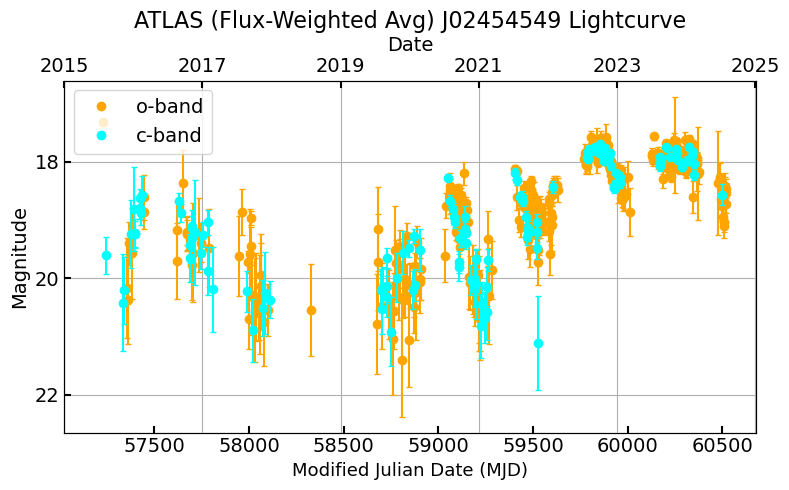

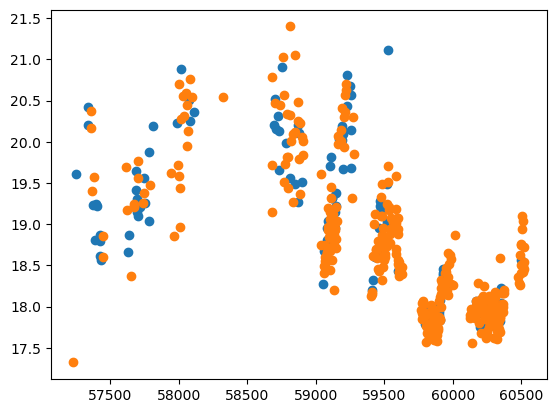

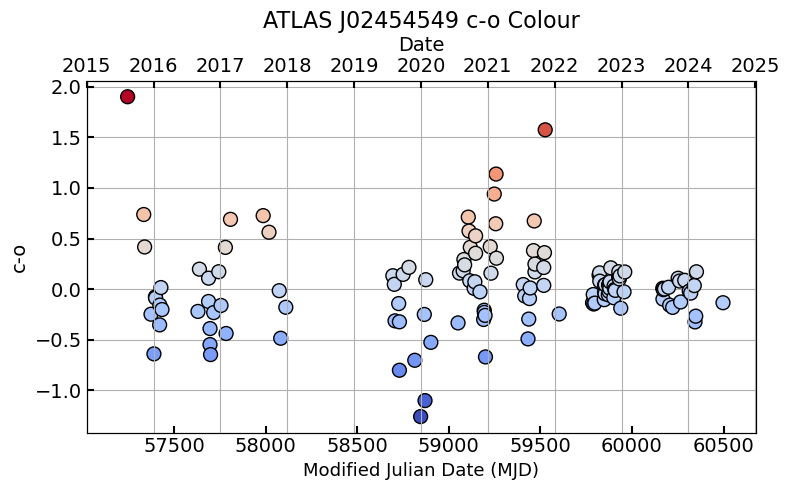

In [13]:
# My own error cut trail
atlas_c_df = atlas_c_df[atlas_c_df.dm / atlas_c_df.m < 0.05] # 5%
atlas_o_df = atlas_o_df[atlas_o_df.dm / atlas_o_df.m < 0.05]

# “cyan” (c) band from 420–650nm, and “orange” (o) band from 560–820nm

mjd_atlas_o = atlas_o_df['MJD']
mag_atlas_o = atlas_o_df['m']
mag_err_atlas_o = atlas_o_df['dm']
mjd_atlas_c = atlas_c_df['MJD']
mag_atlas_c = atlas_c_df['m']
mag_err_atlas_c = atlas_c_df['dm']

# Plot figure
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(2)) # Set y-axis major ticks to 1 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_atlas_o.min()
mjd_end = mjd_atlas_o.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ATLAS (Flux-Weighted Avg) J02454549 Lightcurve', fontsize=16)
ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax2.grid(axis='x')
ax1.grid(axis='y')

# Plot data
ax2.errorbar(mjd_atlas_o, mag_atlas_o, yerr=mag_err_atlas_o, marker='None', linestyle='None', capsize=2, color='orange')
ax2.plot(mjd_atlas_o, mag_atlas_o, 'o', color='orange', label='o-band')
ax2.errorbar(mjd_atlas_c, mag_atlas_c, yerr=mag_err_atlas_c, marker='None', linestyle='None', capsize=2, color='cyan')
ax2.plot(mjd_atlas_c, mag_atlas_c, 'o', color='cyan', label='c-band')

ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Magnitude', fontsize=14)

fig.tight_layout()
ax2.legend(frameon=True, loc='upper left', fontsize=14)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ATLAS_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()



# Calculate the color (c - o)
interp_func = interp1d(mjd_atlas_o, mag_atlas_o, kind='linear', fill_value="extrapolate")  # You can change the interpolation method
mag_atlas_o_interpolated = interp_func(mjd_atlas_c)
c_minus_o = mag_atlas_c - mag_atlas_o_interpolated
#c_minus_o = g_minus_r[1:]
#mjd_colour = mjd_ztf_g[1:]

plt.plot(mjd_atlas_c, mag_atlas_c, linestyle='None', marker='o')
plt.plot(mjd_atlas_o, mag_atlas_o, linestyle='None', marker='o')
plt.show()

# Plot ZTF colour
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.5)) # Set y-axis major ticks to 0.5 steps
#ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_atlas_o.min()
mjd_end = mjd_atlas_o.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 1
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ATLAS J02454549 c-o Colour', fontsize=16)

ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
#ax1.set_ylim(17.9, 16.1)
ax2.grid(axis='x')
ax1.grid(axis='y')

#ax2.plot(mjd_colour, g_minus_r, 'o')
# Normalize g_minus_r to map to the colormap
norm = plt.Normalize(vmin=min(c_minus_o), vmax=max(c_minus_o))

# Create a scatter plot with color mapping
sc = ax2.scatter(mjd_atlas_c, c_minus_o, c=c_minus_o, cmap='coolwarm', norm=norm, edgecolor='black', s=100)

# Add a colorbar to show the mapping
#cbar = plt.colorbar(sc, ax=ax2)
#cbar.set_label('g - r Colour Index')

ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('c-o', fontsize=14)


# Lines marking spectroscopy
#ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data spectra was recorded
#ax2.set_ylim(17.8, 16.2)

#ax2.legend(frameon=True, loc='lower right', fontsize=14)
fig.tight_layout()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ATLAS_Colour.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

Combined Subplot (No ATLAS)

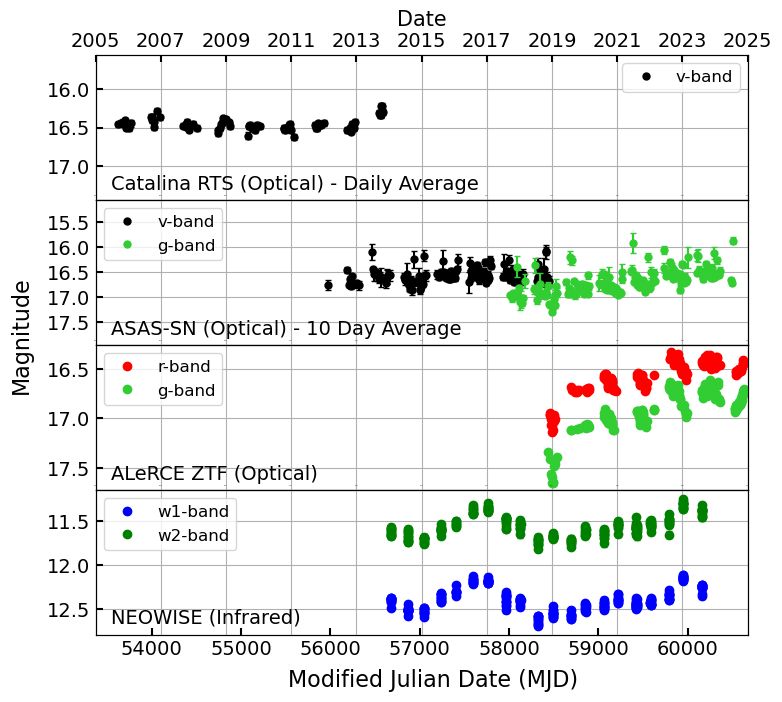

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 8), sharex=True)
axtop1 = ax1.twiny() # Create a secondary x-axis on the top
axtop2 = ax2.twiny()
axtop3 = ax3.twiny()
axtop4 = ax4.twiny()

# Get the range of MJD values and corresponding years
mjd_start = mjd_catalina.min()
mjd_end = mjd_asassn_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years and plot year grid lines
axtop1.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
axtop1.set_xlabel('Date', fontsize=15)
ax1.set_xlim(mjd_start, mjd_end)
axtop1.set_xlim(ax1.get_xlim())
axtop1.set_xticks(year_ticks)
axtop1.set_xticklabels(year_labels)
axtop1.grid(axis='x')
ax1.grid(axis='y')
axtop2.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax2.set_xlim(mjd_start, mjd_end)
axtop2.set_xlim(ax2.get_xlim())
axtop2.set_xticks(year_ticks)
axtop2.set_xticklabels(year_labels)
axtop2.grid(axis='x')
ax2.grid(axis='y')
axtop3.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax3.set_xlim(mjd_start, mjd_end)
axtop3.set_xlim(ax3.get_xlim())
axtop3.set_xticks(year_ticks)
axtop3.set_xticklabels(year_labels)
axtop3.grid(axis='x')
ax3.grid(axis='y')
axtop4.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax4.set_xlim(mjd_start, mjd_end)
axtop4.set_xlim(ax4.get_xlim())
axtop4.set_xticks(year_ticks)
axtop4.set_xticklabels(year_labels)
axtop4.grid(axis='x')
ax4.grid(axis='y')


# Plot the first light curve
#axtop1.errorbar(mjd_catalina, mag_catalina, yerr=mag_err_catalina, marker='None', linestyle='None', capsize=2, color='black')
#axtop1.plot(mjd_catalina, mag_catalina, 'o', color='black', label='v-band', markersize=5)
axtop1.errorbar(avg_mjd_catalina, avg_mag_catalina, yerr=avg_mag_err_catalina, marker='None', linestyle='None', capsize=2, color='black')
axtop1.plot(avg_mjd_catalina, avg_mag_catalina, 'o', color='black', label='v-band', markersize=5)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.invert_yaxis()
ax1.set_ylim(17.45, 15.55)
ax1.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the second light curve
#axtop2.errorbar(mjd_asassn_v, mag_asassn_v, yerr=mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='black')
#axtop2.plot(mjd_asassn_v, mag_asassn_v, 'o', color='black', label='v-band', markersize=5)
#axtop2.errorbar(mjd_asassn_g, mag_asassn_g, yerr=mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='limegreen')
#axtop2.plot(mjd_asassn_g, mag_asassn_g, 'o', color='limegreen', label='g-band', markersize=5)
axtop2.errorbar(avg_mjd_asassn_v, avg_mag_asassn_v, yerr=avg_mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='black')
axtop2.plot(avg_mjd_asassn_v, avg_mag_asassn_v, 'o', color='black', label='v-band', markersize=5)
axtop2.errorbar(avg_mjd_asassn_g, avg_mag_asassn_g, yerr=avg_mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='limegreen')
axtop2.plot(avg_mjd_asassn_g, avg_mag_asassn_g, 'o', color='limegreen', label='g-band', markersize=5)
axtop2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.invert_yaxis()
ax2.set_ylim(17.95, 15.05)
ax2.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the third light curve
axtop3.plot(mjd_ztf_r, mag_ztf_r, 'o', color='red', label='r-band')
axtop3.plot(mjd_ztf_g, mag_ztf_g, 'o', color='limegreen', label='g-band')
axtop3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.invert_yaxis()
ax3.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the fourth light curve
axtop4.errorbar(mjd_neowise, mag_neowise_w1, yerr=mag_err_neowise_w1 , marker='None', linestyle='None', capsize=2, color='blue')
axtop4.plot(mjd_neowise, mag_neowise_w1, 'o', color='blue', label='w1-band')
axtop4.errorbar(mjd_neowise, mag_neowise_w2, yerr=mag_err_neowise_w2 , marker='None', linestyle='None', capsize=2, color='green')
axtop4.plot(mjd_neowise, mag_neowise_w2, 'o', color='green', label='w2-band')
axtop4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.invert_yaxis()
ax4.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Axis Labels
fig.text(0.55, 0.09, 'Modified Julian Date (MJD)', ha='center', fontsize=16)
fig.text(0.08, 0.53, 'Magnitude', va='center', rotation='vertical', fontsize=16)

# Legends
axtop1.legend(fontsize='large')
axtop2.legend(fontsize='large')
axtop3.legend(fontsize='large')
axtop4.legend(fontsize='large')
#axtop1.text(58200, 17.0, 'Catalina RTS (Optical)', fontsize=14)
axtop1.text(53550, 17.32, 'Catalina RTS (Optical) - Daily Average', fontsize=14)
axtop2.text(53550, 17.75, 'ASAS-SN (Optical) - 10 Day Average', fontsize=14)
axtop3.text(53550, 17.62, 'ALeRCE ZTF (Optical)', fontsize=14)
axtop4.text(53550, 12.65, 'NEOWISE (Infrared)', fontsize=14)

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.155, left=0.175)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "All_Photometry_Lightcurves.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

Combined Subplot (With ATLAS)

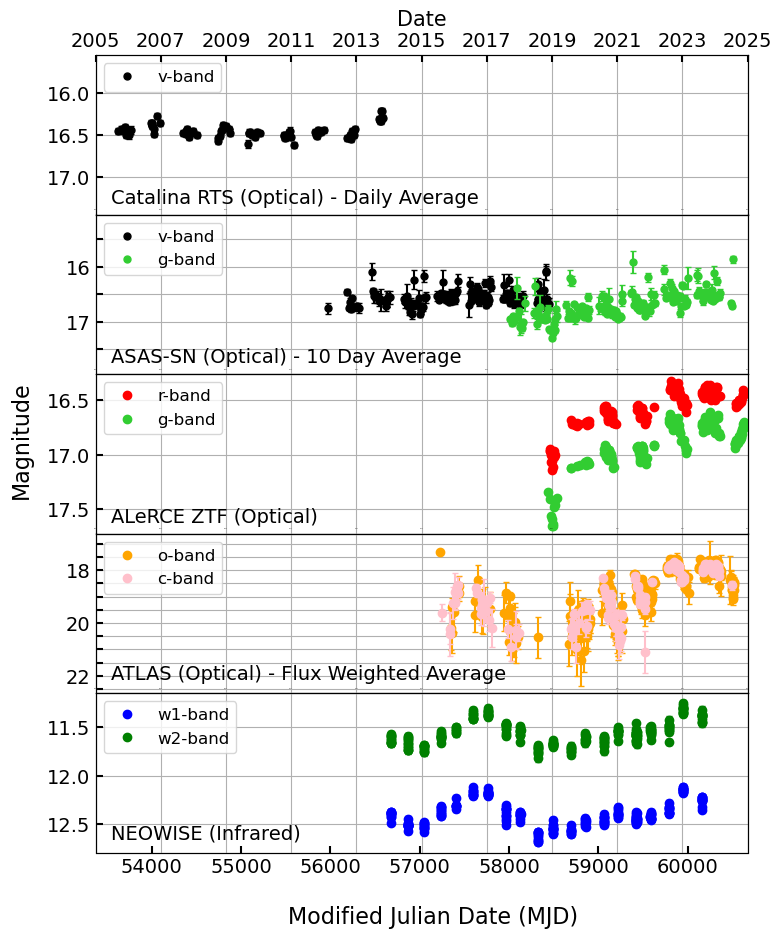

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(9, 11), sharex=True)
axtop1 = ax1.twiny() # Create a secondary x-axis on the top
axtop2 = ax2.twiny()
axtop3 = ax3.twiny()
axtop4 = ax4.twiny()
axtop5 = ax5.twiny()

# Get the range of MJD values and corresponding years
mjd_start = mjd_catalina.min()
mjd_end = mjd_asassn_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years and plot year grid lines
axtop1.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
axtop1.set_xlabel('Date', fontsize=15)
ax1.set_xlim(mjd_start, mjd_end)
axtop1.set_xlim(ax1.get_xlim())
axtop1.set_xticks(year_ticks)
axtop1.set_xticklabels(year_labels)
axtop1.grid(axis='x')
ax1.grid(axis='y')
axtop2.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax2.set_xlim(mjd_start, mjd_end)
axtop2.set_xlim(ax2.get_xlim())
axtop2.set_xticks(year_ticks)
axtop2.set_xticklabels(year_labels)
axtop2.grid(axis='x')
ax2.grid(axis='y', which='both')
axtop3.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax3.set_xlim(mjd_start, mjd_end)
axtop3.set_xlim(ax3.get_xlim())
axtop3.set_xticks(year_ticks)
axtop3.set_xticklabels(year_labels)
axtop3.grid(axis='x')
ax3.grid(axis='y')
axtop4.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax4.set_xlim(mjd_start, mjd_end)
axtop4.set_xlim(ax4.get_xlim())
axtop4.set_xticks(year_ticks)
axtop4.set_xticklabels(year_labels)
axtop4.grid(axis='x')
ax4.grid(axis='y', which='both')
axtop5.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax5.set_xlim(mjd_start, mjd_end)
axtop5.set_xlim(ax5.get_xlim())
axtop5.set_xticks(year_ticks)
axtop5.set_xticklabels(year_labels)
axtop5.grid(axis='x')
ax5.grid(axis='y')


# Plot the first light curve
axtop1.errorbar(avg_mjd_catalina, avg_mag_catalina, yerr=avg_mag_err_catalina, marker='None', linestyle='None', capsize=2, color='black')
axtop1.plot(avg_mjd_catalina, avg_mag_catalina, 'o', color='black', label='v-band', markersize=5)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.invert_yaxis()
ax1.set_ylim(17.45, 15.55)
ax1.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the second light curve
axtop2.errorbar(avg_mjd_asassn_v, avg_mag_asassn_v, yerr=avg_mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='black')
axtop2.plot(avg_mjd_asassn_v, avg_mag_asassn_v, 'o', color='black', label='v-band', markersize=5)
axtop2.errorbar(avg_mjd_asassn_g, avg_mag_asassn_g, yerr=avg_mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='limegreen')
axtop2.plot(avg_mjd_asassn_g, avg_mag_asassn_g, 'o', color='limegreen', label='g-band', markersize=5)
axtop2.yaxis.set_major_locator(MultipleLocator(1))
axtop2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.invert_yaxis()
ax2.set_ylim(17.95, 15.05)
ax2.tick_params(axis='y', direction='in', which='both', labelsize=14, length=5, width=1.5)

# Plot the third light curve
axtop3.plot(mjd_ztf_r, mag_ztf_r, 'o', color='red', label='r-band')
axtop3.plot(mjd_ztf_g, mag_ztf_g, 'o', color='limegreen', label='g-band')
axtop3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.invert_yaxis()
ax3.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the fourth light curve
axtop4.errorbar(mjd_atlas_o, mag_atlas_o, yerr=mag_err_atlas_o, marker='None', linestyle='None', capsize=2, color='orange')
axtop4.plot(mjd_atlas_o, mag_atlas_o, 'o', color='orange', label='o-band')
axtop4.errorbar(mjd_atlas_c, mag_atlas_c, yerr=mag_err_atlas_c, marker='None', linestyle='None', capsize=2, color='pink')
axtop4.plot(mjd_atlas_c, mag_atlas_c, 'o', color='pink', label='c-band')
axtop4.yaxis.set_major_locator(MultipleLocator(2))
axtop4.yaxis.set_minor_locator(MultipleLocator(0.5))
ax4.invert_yaxis()
ax4.tick_params(axis='y', direction='in', which='both', labelsize=14, length=5, width=1.5)
#ax4.tick_params(axis='y', direction='in', which='minor', labelsize=14, length=5, width=1.5)

# Plot the fifth light curve
axtop5.errorbar(mjd_neowise, mag_neowise_w1, yerr=mag_err_neowise_w1 , marker='None', linestyle='None', capsize=2, color='blue')
axtop5.plot(mjd_neowise, mag_neowise_w1, 'o', color='blue', label='w1-band')
axtop5.errorbar(mjd_neowise, mag_neowise_w2, yerr=mag_err_neowise_w2 , marker='None', linestyle='None', capsize=2, color='green')
axtop5.plot(mjd_neowise, mag_neowise_w2, 'o', color='green', label='w2-band')
axtop5.yaxis.set_major_locator(MultipleLocator(0.5))
ax5.invert_yaxis()
ax5.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)


# Axis Labels
fig.text(0.55, 0.09, 'Modified Julian Date (MJD)', ha='center', fontsize=16)
fig.text(0.08, 0.53, 'Magnitude', va='center', rotation='vertical', fontsize=16)

# Legends
axtop1.legend(fontsize='large', loc='upper left')
axtop2.legend(fontsize='large')
axtop3.legend(fontsize='large')
axtop4.legend(fontsize='large')
axtop5.legend(fontsize='large')
#axtop1.text(58200, 17.0, 'Catalina RTS (Optical)', fontsize=14)
axtop1.text(53550, 17.32, 'Catalina RTS (Optical) - Daily Average', fontsize=14)
axtop2.text(53550, 17.75, 'ASAS-SN (Optical) - 10 Day Average', fontsize=14)
axtop3.text(53550, 17.62, 'ALeRCE ZTF (Optical)', fontsize=14)
axtop4.text(53550, 22.15, 'ATLAS (Optical) - Flux Weighted Average', fontsize=14)
axtop5.text(53550, 12.65, 'NEOWISE (Infrared)', fontsize=14)

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.155, left=0.175)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "All_Photometry_Lightcurves_With_ATLAS.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

Plotting Shared Bands

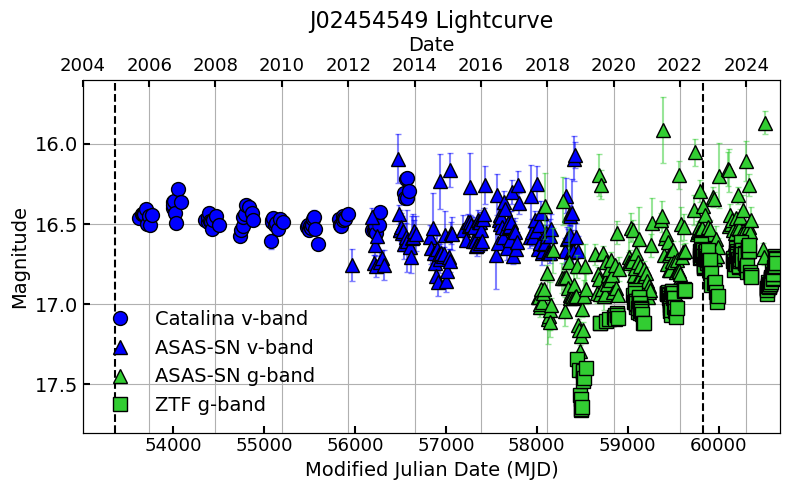

In [16]:
# Plot figure
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(1)) # Set y-axis major ticks to 1 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_catalina.min()
mjd_end = mjd_asassn_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year - 1 # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.grid(axis='x')
ax1.grid(axis='y')


# Plot Catalina
ax2.errorbar(avg_mjd_catalina, avg_mag_catalina, yerr=avg_mag_err_catalina, marker='None', linestyle='None', capsize=2, color='blue', alpha=0.5)
ax2.plot(avg_mjd_catalina, avg_mag_catalina, marker='o', color='blue',linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='Catalina v-band')
# Plot ASASSN
ax2.errorbar(avg_mjd_asassn_v, avg_mag_asassn_v, yerr=avg_mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='blue', alpha=0.5)
ax2.plot(avg_mjd_asassn_v, avg_mag_asassn_v, marker='^', color='blue', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='ASAS-SN v-band')
ax2.errorbar(avg_mjd_asassn_g, avg_mag_asassn_g, yerr=avg_mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='limegreen', alpha=0.5)
ax2.plot(avg_mjd_asassn_g, avg_mag_asassn_g, marker='^', color='limegreen', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='ASAS-SN g-band')
# Plot ZTF
#ax2.plot(mjd_ztf_r, mag_ztf_r, marker='o', color='red', label='r-band', linestyle='None')
ax2.plot(mjd_ztf_g, mag_ztf_g, marker='s', color='limegreen', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='ZTF g-band')

# Plot vertical lines marking spectra dates 22-09-08, 


# Custom legend labels
#ax2.plot(65000, 16.5, marker='s', color='blue', label='v-band')
#ax2.plot(65000, 16.5, marker='s', color='limegreen', label='g-band')
#ax2.plot(65000, 16.5, marker='o', color='black', label='Catalina')
#ax2.plot(65000, 16.5, marker='^', color='black', label='ASASSN')
#ax2.plot(65000, 16.5, marker='s', color='black', label='ZTF')

ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)
ax1.tick_params(axis='x', direction='in', which='major', labelsize=13, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=13, length=5, width=1.5)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('J02454549 Lightcurve', fontsize=16)
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=14)
ax1.set_ylabel('Magnitude', fontsize=14)
fig.tight_layout()
ax2.legend(frameon=False, loc='lower left', fontsize=14)

ax1.vlines(53355, 17.8, 15.6, linestyle='--', color='black') # Data 6df paper was submitted
ax1.vlines(59830, 17.8, 15.6, linestyle='--', color='black') # Data spectra was recorded
ax1.set_ylim(17.8, 15.6)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "Shared_Bands_Lightcurve.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

In [17]:
asassn_g_df

,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
0,2.458013e+06,2017-09-16.3573674,bl,1.86,17.580,16.870,0.114,0.649,0.067,g
1,2.458013e+06,2017-09-16.3585802,bl,2.00,17.689,16.899,0.106,0.632,0.061,g
2,2.458013e+06,2017-09-16.3597939,bl,1.96,17.676,16.921,0.109,0.619,0.062,g
3,2.458014e+06,2017-09-17.3540203,bl,1.59,17.882,17.016,0.099,0.567,0.051,g
4,2.458014e+06,2017-09-17.3552306,bl,1.67,17.730,16.980,0.110,0.586,0.059,g
...,...,...,...,...,...,...,...,...,...,...
2421,2.460514e+06,2024-07-22.0876223,bp,1.96,15.321,14.468,0.100,5.927,0.543,g
2422,2.460516e+06,2024-07-24.3141719,bH,1.56,16.301,15.998,0.166,1.447,0.219,g
2423,2.460518e+06,2024-07-26.0761173,bp,1.54,16.571,16.180,0.153,1.225,0.171,g
2424,2.460518e+06,2024-07-26.3208408,bH,1.63,16.576,16.428,0.191,0.974,0.170,g


In [18]:
asassn_v_df

,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
0,2.455974e+06,2012-02-16.2710459,ba,2.25,17.311,16.747,0.130,0.768,0.091,V
1,2.455974e+06,2012-02-16.2727861,ba,2.28,17.169,16.763,0.151,0.756,0.104,V
2,2.456193e+06,2012-09-22.5401998,ba,2.00,17.098,15.975,0.078,1.562,0.111,V
3,2.456193e+06,2012-09-22.5419369,ba,1.99,17.010,15.831,0.074,1.785,0.121,V
4,2.456194e+06,2012-09-23.5281627,ba,2.15,17.033,16.689,0.160,0.809,0.118,V
...,...,...,...,...,...,...,...,...,...,...
810,2.458437e+06,2018-11-14.4570710,bd,1.41,17.004,16.552,0.144,0.918,0.121,V
811,2.458437e+06,2018-11-14.4583405,bd,1.48,17.040,16.473,0.130,0.988,0.117,V
812,2.458452e+06,2018-11-29.3080994,bd,1.44,17.091,16.932,0.189,0.647,0.112,V
813,2.458452e+06,2018-11-29.3093709,bd,1.45,16.996,16.443,0.132,1.015,0.122,V


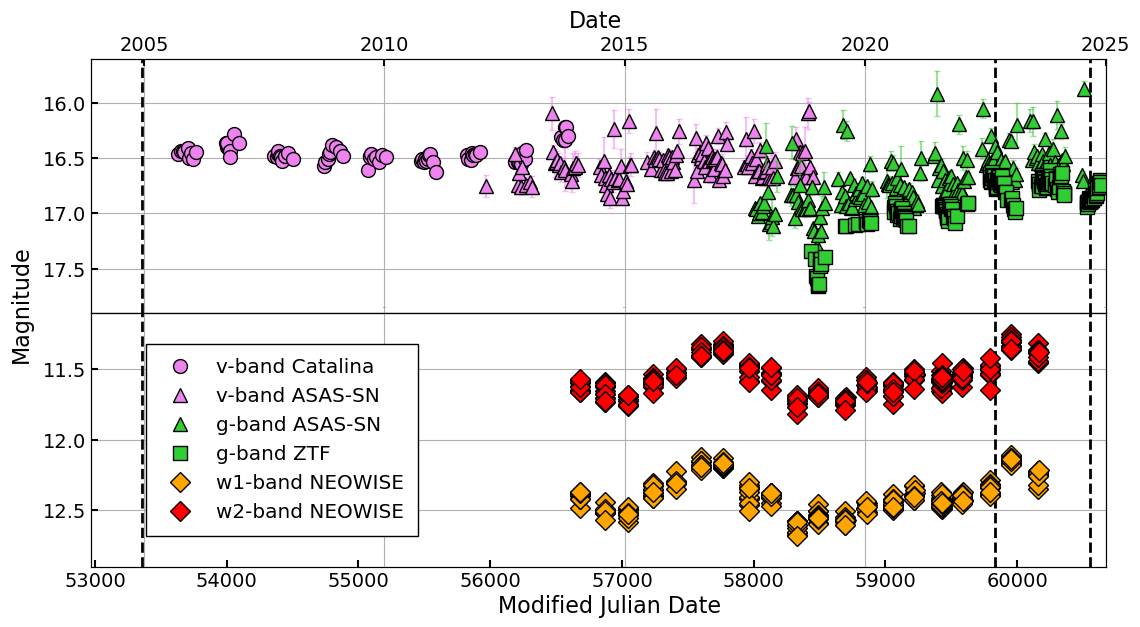

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True)
axtop1 = ax1.twiny() # Create a secondary x-axis on the top
axtop2 = ax2.twiny()

# Get the range of MJD values and corresponding years
mjd_start = mjd_catalina.min()
mjd_end = mjd_asassn_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 5
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years and plot year grid lines
axtop1.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
#axtop1.set_xlabel('Date', fontsize=15)
ax1.set_xlim(mjd_start - 400, mjd_end)
axtop1.set_xlim(ax1.get_xlim())
axtop1.set_xticks(year_ticks)
axtop1.set_xticklabels(year_labels)
axtop1.grid(axis='x')
ax1.grid(axis='y')
axtop2.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax2.set_xlim(mjd_start-400, mjd_end)
axtop2.set_xlim(ax2.get_xlim())
axtop2.set_xticks(year_ticks)
axtop2.set_xticklabels(year_labels)
axtop2.grid(axis='x')
ax2.grid(axis='y', which='both')


# Plot the first light curve
# Plot Catalina
axtop1.errorbar(avg_mjd_catalina, avg_mag_catalina, yerr=avg_mag_err_catalina, marker='None', linestyle='None', capsize=2, color='violet', alpha=0.5)
axtop1.plot(avg_mjd_catalina, avg_mag_catalina, marker='o', color='violet',linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='Catalina v-band')
# Plot ASASSN
axtop1.errorbar(avg_mjd_asassn_v, avg_mag_asassn_v, yerr=avg_mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='violet', alpha=0.5)
axtop1.plot(avg_mjd_asassn_v, avg_mag_asassn_v, marker='^', color='violet', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='ASAS-SN v-band')
axtop1.errorbar(avg_mjd_asassn_g, avg_mag_asassn_g, yerr=avg_mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='limegreen', alpha=0.5)
axtop1.plot(avg_mjd_asassn_g, avg_mag_asassn_g, marker='^', color='limegreen', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='ASAS-SN g-band')
# Plot ZTF
#ax2.plot(mjd_ztf_r, mag_ztf_r, marker='o', color='red', label='r-band', linestyle='None')
axtop1.plot(mjd_ztf_g, mag_ztf_g, marker='s', color='limegreen', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='ZTF g-band')
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.invert_yaxis()
ax1.set_ylim(17.9, 15.6)
ax1.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Custom Legend Markers
axtop2.plot(57000, 13, marker='o', color='violet',linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='v-band Catalina')
axtop2.plot(57000, 13, marker='^', color='violet', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='v-band ASAS-SN')
axtop2.plot(57000, 13, marker='^', color='limegreen', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='g-band ASAS-SN')
axtop2.plot(57000, 13, marker='s', color='limegreen', linestyle='None', markersize=10, markeredgewidth=1, markeredgecolor='black', label='g-band ZTF')

# Plot the third light curve
axtop2.errorbar(mjd_neowise, mag_neowise_w1, yerr=mag_err_neowise_w1 , marker='None', linestyle='None', capsize=2, color='orange')
axtop2.plot(mjd_neowise, mag_neowise_w1, marker='D', linestyle='None', color='orange', label='w1-band NEOWISE', markersize=10, markeredgewidth=1, markeredgecolor='black')
axtop2.errorbar(mjd_neowise, mag_neowise_w2, yerr=mag_err_neowise_w2 , marker='None', linestyle='None', capsize=2, color='red')
axtop2.plot(mjd_neowise, mag_neowise_w2, marker='D', linestyle='None', color='red', label='w2-band NEOWISE', markersize=10, markeredgewidth=1, markeredgecolor='black')
axtop2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.invert_yaxis()
ax2.set_ylim(12.9, 11.1)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)


# Axis Labels
fig.text(0.535, 0.925, 'Date', ha='center', fontsize=16)
fig.text(0.545, 0.09, 'Modified Julian Date', ha='center', fontsize=16)
fig.text(0.117, 0.53, 'Magnitude', va='center', rotation='vertical', fontsize=16)

# Legend
#axtop2.legend(loc='center left', fontsize='large')

legend = axtop2.legend(loc='center left', bbox_to_anchor=(0.05, 0.5), frameon=True, edgecolor='black', facecolor='white', fontsize='x-large')

# Set the square shape by making the width and height equal
legend.get_frame().set_boxstyle('Square')
legend.get_frame().set_alpha(1)

# Lines marking spectroscopy
ax1.vlines(60550, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data 2024 spectra was recorded
ax2.vlines(60550, 12.9, 11.1, linestyle='--', color='black', linewidth=2)
ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data 2022 spectra was recorded
ax2.vlines(59830, 12.9, 11.1, linestyle='--', color='black', linewidth=2)
ax1.vlines(53355, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data 2004 spectra was recorded
ax2.vlines(53355, 12.9, 11.1, linestyle='--', color='black', linewidth=2)
ax2.set_ylim(12.9, 11.1)

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.155, left=0.175)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "Photometry_For_Presentation.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

# Import Flux Calibrated Magnitudes

In [75]:
# Unscaled magnitudes calculated
mag = pd.read_csv('flux_calibrate_mag.csv')
# Scaled to match 2024 narrow [OIII]5007
mag_OIII = pd.read_csv('flux_calibrate_mag_scaled_2024_OIII.csv')
# Scaled to match 2024 narrow [NII]
mag_NII = pd.read_csv('flux_calibrate_mag_scaled_2024_NII.csv')
# Scaled to match 2024 narrow [SII]
mag_SII = pd.read_csv('flux_calibrate_mag_scaled_2024_SII.csv')

# Plot Flux Calibration Magnitude Check

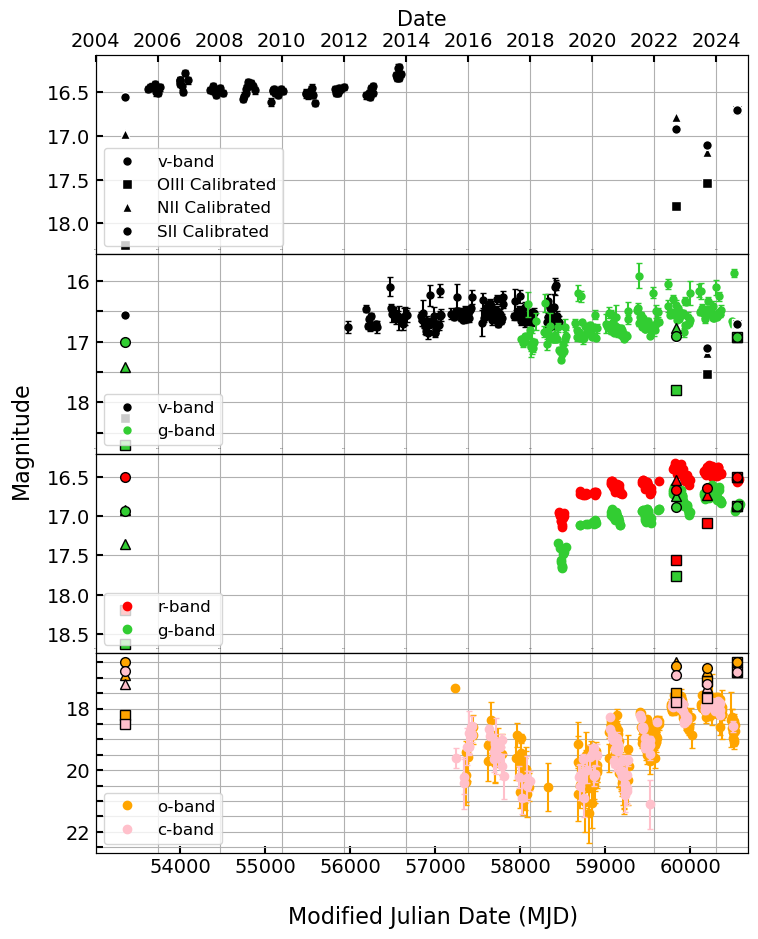

In [126]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 11), sharex=True)
axtop1 = ax1.twiny() # Create a secondary x-axis on the top
axtop2 = ax2.twiny()
axtop3 = ax3.twiny()
axtop4 = ax4.twiny()

# Get the range of MJD values and corresponding years
mjd_start = mjd_catalina.min() - 500
mjd_end = mjd_asassn_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year # custom adjust years for this lightcurve
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 2
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years and plot year grid lines
axtop1.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
axtop1.set_xlabel('Date', fontsize=15)
ax1.set_xlim(mjd_start, mjd_end)
axtop1.set_xlim(ax1.get_xlim())
axtop1.set_xticks(year_ticks)
axtop1.set_xticklabels(year_labels)
axtop1.grid(axis='x')
ax1.grid(axis='y')
axtop2.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax2.set_xlim(mjd_start, mjd_end)
axtop2.set_xlim(ax2.get_xlim())
axtop2.set_xticks(year_ticks)
axtop2.set_xticklabels(year_labels)
axtop2.grid(axis='x')
ax2.grid(axis='y', which='both')
axtop3.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax3.set_xlim(mjd_start, mjd_end)
axtop3.set_xlim(ax3.get_xlim())
axtop3.set_xticks(year_ticks)
axtop3.set_xticklabels(year_labels)
axtop3.grid(axis='x')
ax3.grid(axis='y')
axtop4.tick_params(axis='both', which='major', labelsize=0, length=0, width=0)
ax4.set_xlim(mjd_start, mjd_end)
axtop4.set_xlim(ax4.get_xlim())
axtop4.set_xticks(year_ticks)
axtop4.set_xticklabels(year_labels)
axtop4.grid(axis='x')
ax4.grid(axis='y', which='both')


# Plot the first light curve
axtop1.errorbar(avg_mjd_catalina, avg_mag_catalina, yerr=avg_mag_err_catalina, marker='None', linestyle='None', capsize=2, color='black')
axtop1.plot(avg_mjd_catalina, avg_mag_catalina, 'o', color='black', label='v-band', markersize=5)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.invert_yaxis()
#ax1.set_ylim(17.45, 15.55)
ax1.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the second light curve
axtop2.errorbar(avg_mjd_asassn_v, avg_mag_asassn_v, yerr=avg_mag_err_asassn_v, marker='None', linestyle='None', capsize=2, color='black')
axtop2.plot(avg_mjd_asassn_v, avg_mag_asassn_v, 'o', color='black', label='v-band', markersize=5)
axtop2.errorbar(avg_mjd_asassn_g, avg_mag_asassn_g, yerr=avg_mag_err_asassn_g, marker='None', linestyle='None', capsize=2, color='limegreen')
axtop2.plot(avg_mjd_asassn_g, avg_mag_asassn_g, 'o', color='limegreen', label='g-band', markersize=5)
axtop2.yaxis.set_major_locator(MultipleLocator(1))
axtop2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.invert_yaxis()
#ax2.set_ylim(17.95, 15.05)
ax2.tick_params(axis='y', direction='in', which='both', labelsize=14, length=5, width=1.5)

# Plot the third light curve
axtop3.plot(mjd_ztf_r, mag_ztf_r, 'o', color='red', label='r-band')
axtop3.plot(mjd_ztf_g, mag_ztf_g, 'o', color='limegreen', label='g-band')
axtop3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.invert_yaxis()
ax3.tick_params(axis='y', direction='in', which='major', labelsize=14, length=5, width=1.5)

# Plot the fourth light curve
axtop4.errorbar(mjd_atlas_o, mag_atlas_o, yerr=mag_err_atlas_o, marker='None', linestyle='None', capsize=2, color='orange')
axtop4.plot(mjd_atlas_o, mag_atlas_o, 'o', color='orange', label='o-band')
axtop4.errorbar(mjd_atlas_c, mag_atlas_c, yerr=mag_err_atlas_c, marker='None', linestyle='None', capsize=2, color='pink')
axtop4.plot(mjd_atlas_c, mag_atlas_c, 'o', color='pink', label='c-band')
axtop4.yaxis.set_major_locator(MultipleLocator(2))
axtop4.yaxis.set_minor_locator(MultipleLocator(0.5))
ax4.invert_yaxis()
ax4.tick_params(axis='both', direction='in', which='both', labelsize=14, length=5, width=1.5)
#ax4.tick_params(axis='y', direction='in', which='minor', labelsize=14, length=5, width=1.5)


# Plot spectra calculated magnitudes
axtop1.plot(mag_OIII['mjd'], mag_OIII['catalina_v'], 's', color='black', markeredgewidth=1, markeredgecolor='white', markersize=7, label='OIII Calibrated')
axtop2.plot(mag_OIII['mjd'], mag_OIII['asassn_v'], 's', color='black', markeredgewidth=1, markeredgecolor='white', markersize=7)
axtop2.plot(mag_OIII['mjd'], mag_OIII['asassn_g'], 's', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop3.plot(mag_OIII['mjd'], mag_OIII['ztf_g'], 's', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop3.plot(mag_OIII['mjd'], mag_OIII['ztf_r'], 's', color='red', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop4.plot(mag_OIII['mjd'], mag_OIII['atlas_o'], 's', color='orange', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop4.plot(mag_OIII['mjd'], mag_OIII['atlas_c'], 's', color='pink', markeredgewidth=1, markeredgecolor='black', markersize=7)

# Plot spectra calculated magnitudes
axtop1.plot(mag_NII['mjd'], mag_NII['catalina_v'], '^', color='black', markeredgewidth=1, markeredgecolor='white', markersize=7, label='NII Calibrated')
axtop2.plot(mag_NII['mjd'], mag_NII['asassn_v'], '^', color='black', markeredgewidth=1, markeredgecolor='white', markersize=7)
axtop2.plot(mag_NII['mjd'], mag_NII['asassn_g'], '^', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop3.plot(mag_NII['mjd'], mag_NII['ztf_g'], '^', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop3.plot(mag_NII['mjd'], mag_NII['ztf_r'], '^', color='red', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop4.plot(mag_NII['mjd'], mag_NII['atlas_o'], '^', color='orange', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop4.plot(mag_NII['mjd'], mag_NII['atlas_c'], '^', color='pink', markeredgewidth=1, markeredgecolor='black', markersize=7)

# Plot spectra calculated magnitudes
axtop1.plot(mag_SII['mjd'], mag_SII['catalina_v'], 'o', color='black', markeredgewidth=1, markeredgecolor='white', markersize=7, label='SII Calibrated')
axtop2.plot(mag_SII['mjd'], mag_SII['asassn_v'], 'o', color='black', markeredgewidth=1, markeredgecolor='white', markersize=7)
axtop2.plot(mag_SII['mjd'], mag_SII['asassn_g'], 'o', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop3.plot(mag_SII['mjd'], mag_SII['ztf_g'], 'o', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop3.plot(mag_SII['mjd'], mag_SII['ztf_r'], 'o', color='red', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop4.plot(mag_SII['mjd'], mag_SII['atlas_o'], 'o', color='orange', markeredgewidth=1, markeredgecolor='black', markersize=7)
axtop4.plot(mag_SII['mjd'], mag_SII['atlas_c'], 'o', color='pink', markeredgewidth=1, markeredgecolor='black', markersize=7)

# Axis Labels
fig.text(0.55, 0.09, 'Modified Julian Date (MJD)', ha='center', fontsize=16)
fig.text(0.08, 0.53, 'Magnitude', va='center', rotation='vertical', fontsize=16)

# Legends
axtop1.legend(fontsize='large', loc='lower left')
axtop2.legend(fontsize='large', loc='lower left')
axtop3.legend(fontsize='large', loc='lower left')
axtop4.legend(fontsize='large', loc='lower left')
#axtop1.text(58200, 17.0, 'Catalina RTS (Optical)', fontsize=14)
#axtop1.text(53550, 17.32, 'Catalina RTS (Optical) - Daily Average', fontsize=14)
#axtop2.text(53550, 17.75, 'ASAS-SN (Optical) - 10 Day Average', fontsize=14)
#axtop3.text(53550, 17.62, 'ALeRCE ZTF (Optical)', fontsize=14)
#axtop4.text(53550, 22.15, 'ATLAS (Optical) - Flux Weighted Average', fontsize=14)

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.155, left=0.175)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "CalculatingApparentMagnitude.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

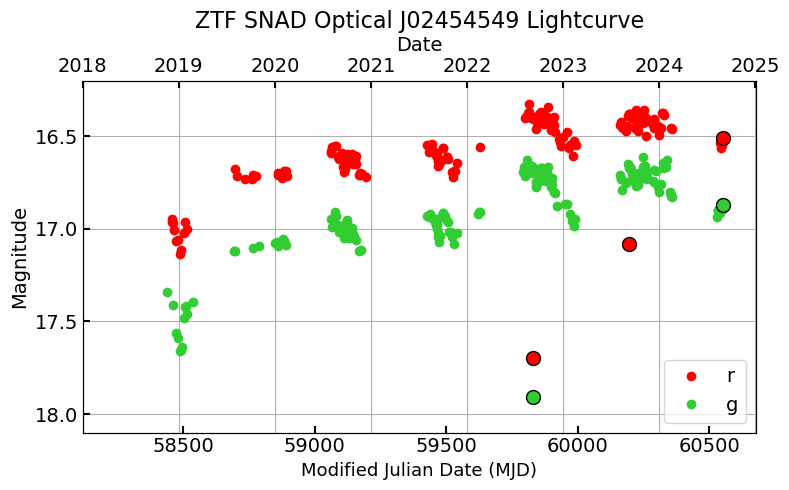

In [39]:
# First split into the 2 bands stored
g_band = ztfsnad_df[ztfsnad_df['fid']==1]
r_band = ztfsnad_df[ztfsnad_df['fid']==2]

mjd_ztf_r = r_band['mjd']
mjd_ztf_g = g_band['mjd']
mag_ztf_r = r_band['mag_corr']
mag_ztf_g = g_band['mag_corr']

# Plot light curve
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.yaxis.set_major_locator(MultipleLocator(0.5)) # Set y-axis major ticks to 0.5 steps
ax1.invert_yaxis() # Invert the y-axis
ax2 = ax1.twiny() # Create a secondary x-axis on the top

# Get the range of MJD values and corresponding years
mjd_start = mjd_ztf_g.min()
mjd_end = mjd_ztf_g.max() # modified to include 2024 label + 200
year_start = mjd_to_date(mjd_start).year
year_end = mjd_to_date(mjd_end).year + 1 # round up with +1
mjd_start = date_to_mjd(datetime.datetime(year_start, 1, 1)) # update mjd start and end based on rounding to years
mjd_end = date_to_mjd(datetime.datetime(year_end, 1, 1))

# Create a list of years with the desired interval (e.g., every 5 years)
year_interval = 1
year_ticks = np.arange(mjd_start, mjd_end, year_interval*365)
year_labels = np.arange(year_start, year_end+1, year_interval)

# Format the secondary x-axis to show years
ax1.set_xlim(mjd_start, mjd_end)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(year_labels)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_title('ZTF SNAD Optical J02454549 Lightcurve', fontsize=16)

ax1.tick_params(axis='both', direction='in', which='major', right=False, labelsize=14, length=5, width=1.5)
ax2.tick_params(axis='both', direction='in', which='major', labelsize=14, length=5, width=1.5)
#ax1.set_ylim(17.9, 16.1)
ax2.grid(axis='x')
ax1.grid(axis='y')

ax2.plot(mjd_ztf_r, mag_ztf_r, 'o', color='red', label='r')
ax2.plot(mjd_ztf_g, mag_ztf_g, 'o', color='limegreen', label='g')
ax1.set_xlabel('Modified Julian Date (MJD)', fontsize=13)
ax1.set_ylabel('Magnitude', fontsize=14)

# Plot flux calibrated values (Magnitudes derived from spectra)
ax2.plot(mag['mjd'], mag['ztf_g'], 'o', color='limegreen', markeredgewidth=1, markeredgecolor='black', markersize=10)
ax2.plot(mag['mjd'], mag['ztf_r'], 'o', color='red', markeredgewidth=1, markeredgecolor='black', markersize=10)


# Lines marking spectroscopy
#ax1.vlines(59830, 17.9, 15.6, linestyle='--', color='black', linewidth=2) # Data spectra was recorded
#ax2.set_ylim(17.8, 16.2)
ax2.set_ylim(18.1, 16.2)

ax2.legend(frameon=True, loc='lower right', fontsize=14)
fig.tight_layout()

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "ZTF_Lightcurve.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

ZTF Colour Plot